In [3]:
'''
Date: 20230214
Aim: background subtraction using images with water
Author: Yike Xie
'''

'\nDate: 20230214\nAim: background subtraction using images with water\nAuthor: Yike Xie\n'

In [4]:
import numpy as np
import pandas as pd
import os
import cv2
import h5py

import matplotlib.pyplot as plt
from skimage import filters
import pickle

# background_substraction

In [5]:
fdn = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/'
fdn_cell = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/cancer100cells/'
sig_fns = os.listdir(fdn_cell)
fdn_dis = os.path.join(fdn_cell, 'doublets/distant_cells')
dis_fns = os.listdir(fdn_dis)
fdn_db = os.path.join(fdn_cell, 'doublets/doublets')
db_fns = os.listdir(fdn_db)

In [6]:
# blur image
def blur_cells(fns, fdn, sigma, fdn_save):
    for i, fn in enumerate(fns):
        print('{}: {}/{}'.format(fn.split('.')[0], i+1, len(fns)))

        print('load water control...')
        ctl1 = np.load(os.path.join(fdn + 'seg_water_1/', fn))
        ctl2 = np.load(os.path.join(fdn + 'seg_water_2/', fn))
        
        print('load calibration sample')
        cal1 = np.load(os.path.join(fdn + 'seg_cal_2/', fn))
        cal2 = np.load(os.path.join(fdn + 'seg_cal_3/', fn))

        print('load sample...')
        if fn in sig_fns:
            cell = np.load(os.path.join(fdn_cell, fn))
        elif fn in dis_fns:
            cell = np.load(os.path.join(fdn_dis, fn))
        elif fn in db_fns:
            cell = np.load(os.path.join(fdn_db, fn))

        print('blur images')
        img_sub = {}
        for file in ctl1.files:
            # blur waters
            ctl1_file = ctl1[file]
            img_ctl_blurred1 = filters.gaussian(ctl1_file, sigma=sigma,truncate=3.5, 
                                channel_axis=None, preserve_range=True)
            
            ctl2_file = ctl2[file]
            img_ctl_blurred2 = filters.gaussian(ctl2_file, sigma=sigma,truncate=3.5, 
                                channel_axis=None, preserve_range=True)
            img_ctl_blurred = (img_ctl_blurred1 + img_ctl_blurred2) / 2
            # blur calibrations
            
            
            
            # flatten the cells
            

            cell_file = cell[file] - img_ctl_blurred
            img_cell_blurred = filters.gaussian(cell_file, sigma=sigma,truncate=3.5, 
                                channel_axis=None, preserve_range=True)

            img_sub[file] = img_cell_blurred

        img_sub['segmentation'] = cell['new_segmentation']

        if fdn_save is not False:
            print('save the background subtracted cell to file')
            np.savez_compressed(fdn_save + fn, **img_sub)
    
####
def plot_coms(fdn, fn, file, xmax, sigma):
    print('load dark sample...')
    t1 = np.load(os.path.join(fdn + 'seg_test_1/', fn))
    t2 = np.load(os.path.join(fdn + 'seg_test_2/', fn))

    print('load water control...')
    ctl1 = np.load(os.path.join(fdn + 'seg_water_1/', fn))
    ctl2 = np.load(os.path.join(fdn + 'seg_water_2/', fn))

    print('load sample...')
    if fn in sig_fns:
        cell = np.load(os.path.join(fdn_cell, fn))
    elif fn in dis_fns:
        cell = np.load(os.path.join(fdn_dis, fn))
    elif fn in db_fns:
        cell = np.load(os.path.join(fdn_db, fn))
    
    mask = cell['new_segmentation']
    
    black = (t1[file] + t2[file]) / 2
    fig, axs = plt.subplots(2, 4, figsize=[21, 3])
    ###
    axs[0, 0].imshow(ctl1[file] * mask, vmax=vmax)
    axs[0, 0].set_title('water-1')
    ###
    img_ctl_blurred1 = filters.gaussian(ctl1[file] - black, sigma=sigma,truncate=3.5, 
                        channel_axis=None, preserve_range=True)
    axs[1, 0].imshow(img_ctl_blurred1 * mask, vmax=vmax)
    axs[1, 0].set_title('blurred water-1')
    ###
    axs[0, 1].imshow(ctl2[file] * mask, vmax=vmax)
    axs[0, 1].set_title('water-2')
    ###
    img_ctl_blurred2 = filters.gaussian(ctl2[file]-black, sigma=sigma,truncate=3.5, 
                        channel_axis=None, preserve_range=True)
    axs[1, 1].imshow(img_ctl_blurred2 * mask, vmax=vmax)
    axs[1, 1].set_title('blurred water-2')
    ###
    axs[0, 2].imshow(cell[file] * mask, vmax=vmax)
    axs[0, 2].set_title(fn.split('.')[0])
    ###
    img_cell_blurred = filters.gaussian(cell[file] - black, sigma=sigma,truncate=3.5, 
                        channel_axis=None, preserve_range=True)
    axs[1, 2].imshow(img_cell_blurred * mask, vmax=vmax)
    axs[1, 2].set_title('blurred {}'.format(fn.split('.')[0]))
    ###
    axs[0, 3].imshow(black * mask, vmax=vmax)
    axs[0, 3].set_title('black')
    ###
    axs[1, 3].imshow((img_cell_blurred - (img_ctl_blurred1 + img_ctl_blurred2) / 2) * mask, 
                    vmax=vmax)
    axs[1, 3].set_title('background subtracted {}'.format(fn.split('.')[0]))

In [10]:
sigma = 5
fns = os.listdir(fdn + 'seg_water_1/')
# fns = ['H7_S58.npz']
fdn_save = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/background_subtraction/'

blur_cells(fns, fdn, sigma, fdn_save)

C6_S40: 1/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
I8_S72: 2/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
J3_S8: 3/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
H10_S97: 4/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
J10_S99: 5/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
G11_S109: 6/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
C7_S53: 7/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
L3_S10: 8/121
load dark sample...
load water control...
load sample...
blur images
save the background subtr

K9_S87: 65/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
H5_S32: 66/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
I5_S33: 67/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
O8_S78: 68/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
C3_S1: 69/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
F6_S43: 70/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
L8_S75: 71/121
load dark sample...
load water control...
load sample...
blur images
save the background subtracted cell to file
M3_S11: 72/121
load dark sample...
load water control...
load sample...
blur images
save the background s

load dark sample...
load water control...
load sample...


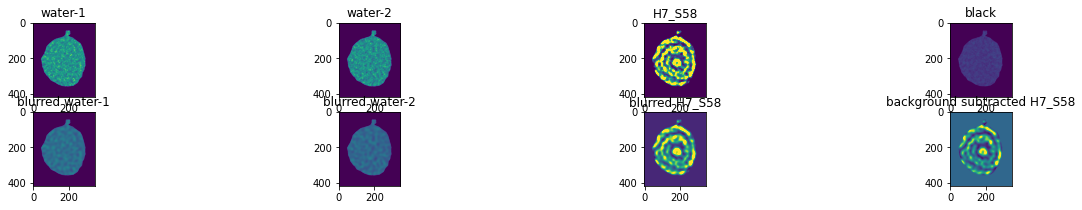

In [6]:
fn = fns[0]
fdn_save = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/test/'
vmax = 10000
file = 'wls_480_594'
plot_coms(fdn, fn, file, vmax, sigma)

# feature_extraction

In [11]:
def extract_features(fn):
    img = np.load(fn)
    mask = img['segmentation']
    
    # Area
    area = mask.sum()
    # Horizontal length
    length = mask.any(axis=0).nonzero()[0]
    length = length[-1] - length[0]
    # Vertical width (waist line)
    width = mask.any(axis=1).nonzero()[0]
    width = width[-1] - width[0]
    # Eccentricity
    ecc = length / width

    # Wavelengths
    wls = [(int(wl.split('_')[1]), int(wl.split('_')[2])) for wl in img.files[:-1]]
    
    # Total Intensity
    total_int = [(img[wl] * mask).sum() for wl in img.files[:-1]]
    
    # Average Intensity
    ave_int = [int_i/area for int_i in total_int]
    
    feas = {
        'area': area,
        'length': length,
        'width': width,
        'eccentricity': ecc,
        'image': fn.split('/')[-1].split('.')[0],
        'wavelengths': wls,
        'total_intensity': total_int,
        'ave_intensity': ave_int,
    }

    return feas

In [12]:
# cells
fdn_save = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/background_subtraction/'

features = []
for i, fn in enumerate([i for i in os.listdir(fdn_save) if '.npz' in i]):
    print('{} cell: {}'.format(i+1, fn.split('.')[0]))
    feas = extract_features(os.path.join(fdn_save, fn))
    features.append(feas)
features_all = pd.DataFrame(features)

# save features as a pickle file
with open(fdn_save + 'bkg_sub_features.pkl', 'wb') as f:
    pickle.dump(features_all, f)

1 cell: C6_S40
2 cell: I8_S72
3 cell: J3_S8
4 cell: H10_S97
5 cell: J10_S99
6 cell: G11_S109
7 cell: C7_S53
8 cell: L3_S10
9 cell: C5_S27
10 cell: G3_S5
11 cell: E11_S107
12 cell: J12_S125
13 cell: D5_S28
14 cell: H8_S71
15 cell: I12_S124
16 cell: F8_S69
17 cell: G9_S83
18 cell: M4_S24
19 cell: I11_S111
20 cell: G5_S31
21 cell: J8_S73
22 cell: I10_S98
23 cell: I7_S59
24 cell: F12_S121
25 cell: O4_S26
26 cell: L9_S88
27 cell: G7_S57
28 cell: E10_S94
29 cell: I4_S20
30 cell: J9_S86
31 cell: C11_S105
32 cell: K10_S100
33 cell: F7_S56
34 cell: E7_S55
35 cell: G12_S122
36 cell: F11_S108
37 cell: M5_S37
38 cell: O10_S104
39 cell: E12_S120
40 cell: M7_S63
41 cell: E8_S68
42 cell: E5_S29
43 cell: D12_S119
44 cell: E9_S81
45 cell: J7_S60
46 cell: O11_S117
47 cell: F10_S95
48 cell: D11_S106
49 cell: F5_S30
50 cell: K6_S48
51 cell: L10_S101
52 cell: N6_S51
53 cell: K8_S74
54 cell: J6_S47
55 cell: N8_S77
56 cell: F9_S82
57 cell: N5_S38
58 cell: C8_S66
59 cell: M10_S102
60 cell: I6_S46
61 cell: D9_

# Shifting for each cell

In [16]:
fdn_save = '/home/yike/phd/cancer_cells_img_seq/figures/segmentation/background_subtraction/'
with open(fdn_save + 'bkg_sub_features.pkl','rb') as f:
    features_all = pickle.load(f)

In [17]:
df = pd.DataFrame([], index=features_all['image'])
for i, wl in enumerate(features_all.loc[0]['wavelengths']):
    df['{} {}'.format(str(wl[0]), str(wl[1]))] = [fea[i] for fea in features_all['total_intensity']]
    
neg = []
for i in df.index:
    neg.append(sum(1 for n in df.loc[i] if n < 0))
df['total'] = neg

In [18]:
for col in df.columns:
    n = sum(1 for i in df[col] if i < 0)
    print('{} {}'.format(col, str(n * 100/122) + '%'))

325 414 0.0%
343 414 0.0%
370 414 0.0%
343 451 0.0%
370 451 0.0%
373 451 0.0%
343 575 0.0%
393 575 9.01639344262295%
406 575 23.770491803278688%
441 575 25.40983606557377%
400 594 30.327868852459016%
406 594 32.78688524590164%
431 594 33.60655737704918%
480 594 32.78688524590164%
339 575 56.557377049180324%
total 0.0%


In [31]:
img_interests = df[df['393 575'] < 0].index
len(img_interests) # 9 sig, 1 distance, 1 doublets

11

In [33]:
df['393 575'].max()

152056471.75738698

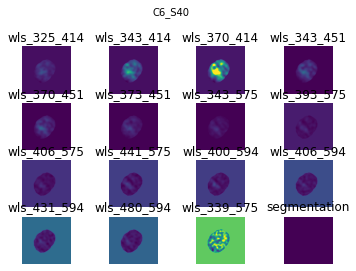

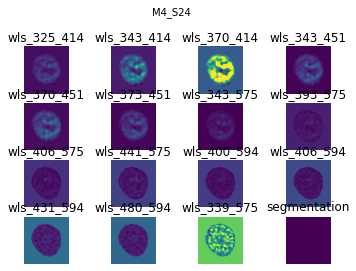

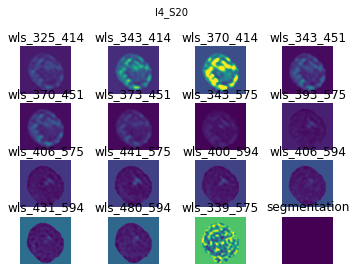

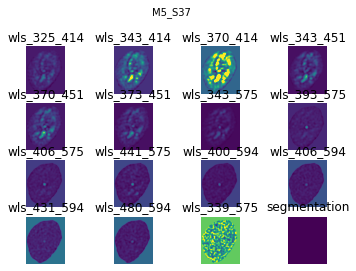

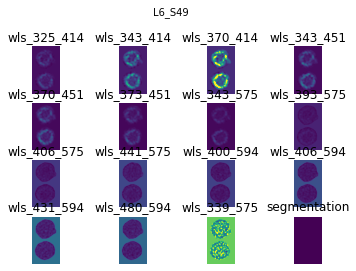

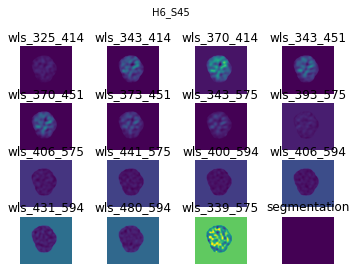

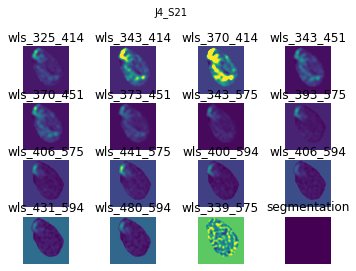

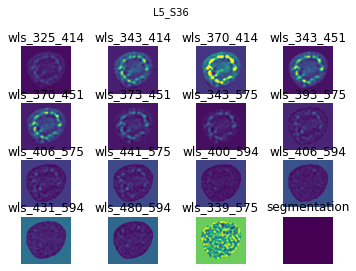

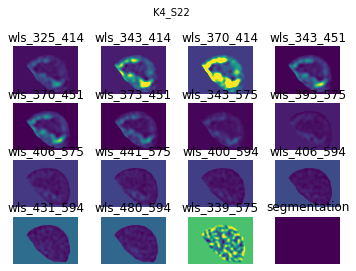

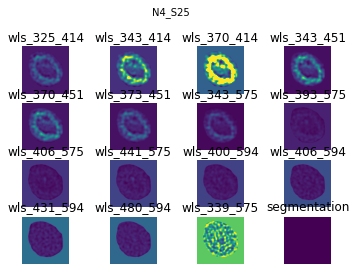

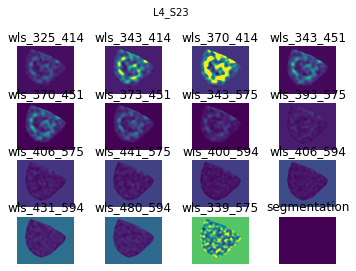

In [20]:
vmax = 10000
for name in img_interests:
    img = np.load(fdn_save + name + '.npz')
    
    fig, axs = plt.subplots(4, 4)
    axs = axs.ravel()
    for i, file in enumerate(img.files[: -1]):
        axs[i].imshow(img[file] * img['segmentation'], vmax=vmax)
        axs[i].set_title(file)
        axs[i].axis('off')
    axs[-1].imshow(img['segmentation'], vmax=vmax)
    axs[-1].set_title('segmentation')
    axs[-1].axis('off')
    fig.text(0.5, 1, name, va='center', ha='center')